# Improving Image Quality 
This notebook contains experiment on detecting and improving blurry images.
## Outline 
  - [1. Import libraries](#1)
  - [2. Initialisation](#2)
  - [3. Visualization](#3)
    - [3.1. Random images](#3.1)
    - [3.2. Blurry images](#3.2)
  - [4. Sharpen Image](#4)

### Detecting Blurry Images
The variance of the Laplacian is used to detect blurry images. The Laplacian operator is used to highlight regions of an image where there is a rapid intensity change typically corresponds to edges. A blurry image will have fewer edges and hence a lower variance of the Laplacian. 
  - A threshold of 100 is used to compare with Laplacian variance to detect blurry images. An image is considered blurry if $image\_variance < threshold$.

### Sharpen Image

Gaussian Blur and Unsharp Masking are used to enhance the sharpness of an image.
How it works:
  1. Gaussian Blur helps to smooth out the image and reduce noise and details that can be problematic in sharpening operation.
  2. Unsharp Masking helps to sharpen the image by subtracting the blurred image from the original image. 

  


<a name="1"></a>
### 1. Import libraries 

In [1]:
import os
import sys 
import cv2
import importlib
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)
import preprocess 
import visualization

<a name="2"></a>
### 2. Initialisation

In [2]:
dataset_path = "/home/norakami/age-prediction/dataset"
# threshold to detect blurry images
threshold = 100.0
# guassian kernel size for blurring
gaussian_blur=(5, 5)
# weight to determine the contribution of original image to final image
unsharp_weight=1.5
# weight to determine the effect of blurred image on final image
blurred_weight=-0.5

<a name="3"></a>
### 3. Image Visualization

<a name="3.1"></a>
#### 3.1. Visualization of Random Images 

![alt-text](/home/norakami/age-prediction/pics/sample_images.png)

<a name="3.2"></a>
#### 3.2. Visualization of Blurry Images 

In [3]:
blurry_images, sharp_images = preprocess.get_blurry_sharp_files(dataset_path, threshold)

In [4]:
print(f"Blurry images len: {len(blurry_images)},\nSharp Images len: {len(sharp_images)}")
# visualization.save_blurry_sharp_pics(dataset_path, blurry_images, sharp_images)

Blurry images len: 646,
Sharp Images len: 29324


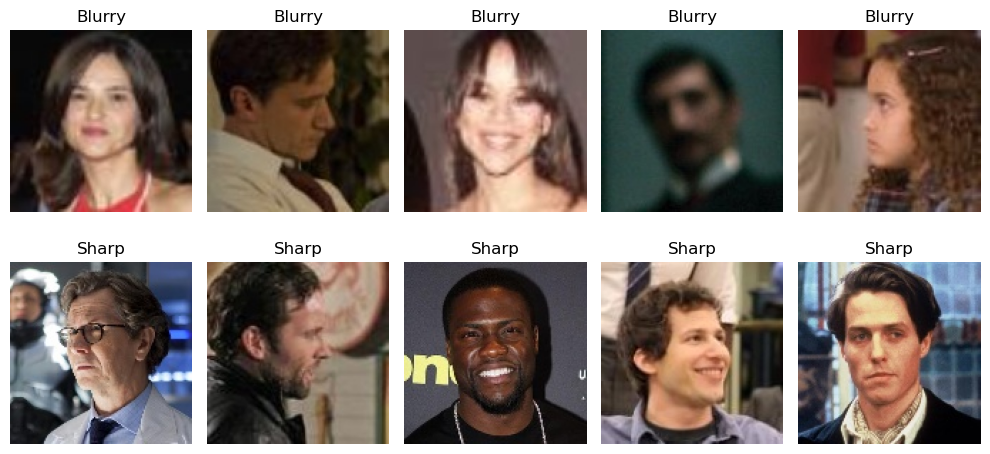

In [5]:
visualization.show_blurry_sharp_pics(dataset_path, blurry_images, sharp_images)

<a name="4"></a>
#### 4. Sharpen Images 

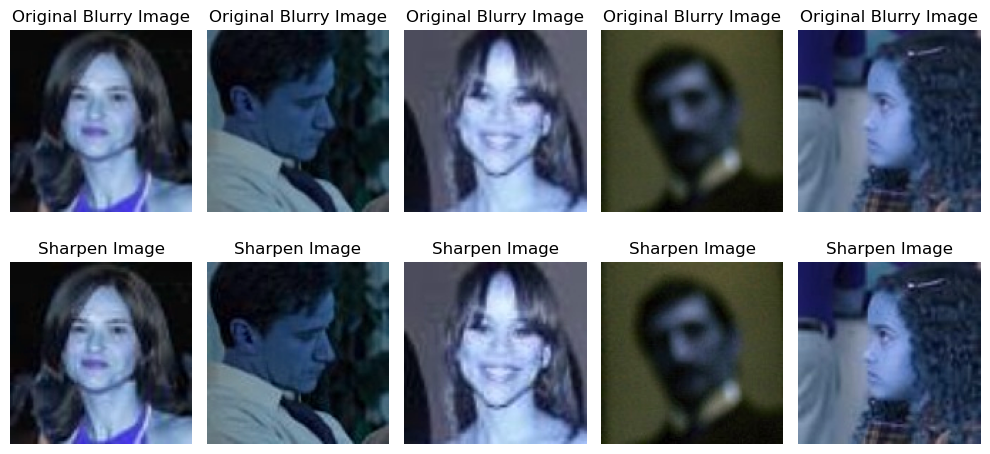

In [6]:
blur_imgs = blurry_images[0:10]
sharpen_imgs = []
original_imgs = []
for filename, age in blur_imgs:
    original_img = cv2.imread(os.path.join(dataset_path, f"{age}/{filename}"))
    sharpen_img = preprocess.sharpen_image(original_img, gaussian_blur, unsharp_weight, blurred_weight)
    sharpen_imgs.append(sharpen_img)
    original_imgs.append(original_img)
visualization.side_by_side_images(original_imgs, sharpen_imgs, "Original Blurry Image", "Sharpen Image")

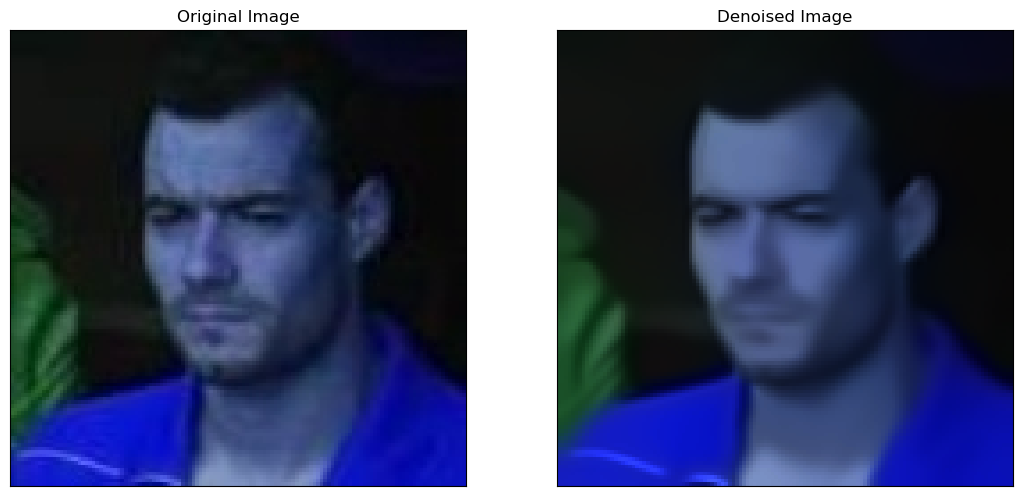

In [7]:
## import dependencies
import cv2
from PIL import Image
import matplotlib.pyplot as plt
## reading image
blur_imgs = blurry_images[0]
img = cv2.imread(os.path.join(dataset_path, f"{age}/{filename}"))

## apply image denoising

dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)

## plot original and denoised image 

titles = ["Original Image", "Denoised Image"]

images = [img, dst]

plt.figure(figsize=(20,20))

for i in range(2):

    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)

    plt.title(titles[i])

    plt.xticks([]),plt.yticks([])

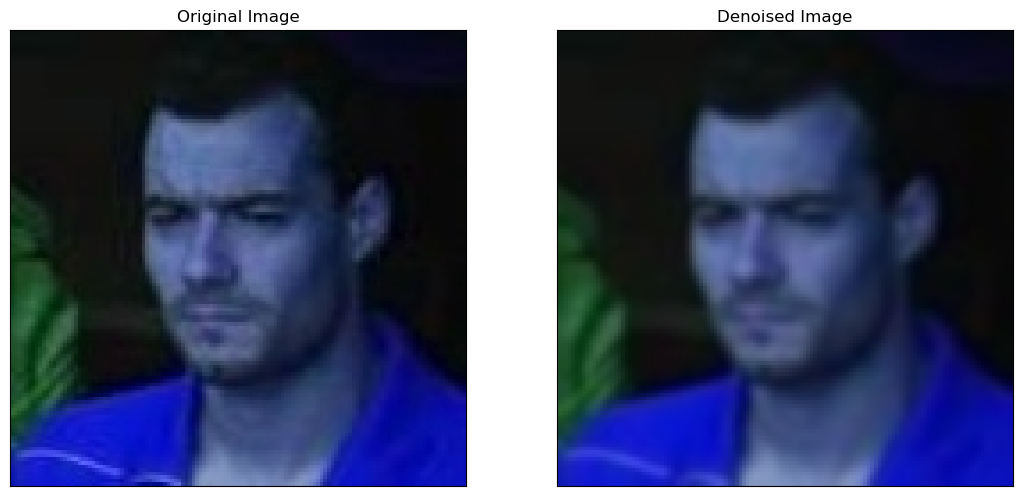

In [8]:
## apply image denoising

dst = cv2.GaussianBlur(img, gaussian_blur, 0)

## plot original and denoised image 

titles = ["Original Image", "Denoised Image"]

images = [img, dst]

plt.figure(figsize=(20,20))

for i in range(2):

    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)

    plt.title(titles[i])

    plt.xticks([]),plt.yticks([])

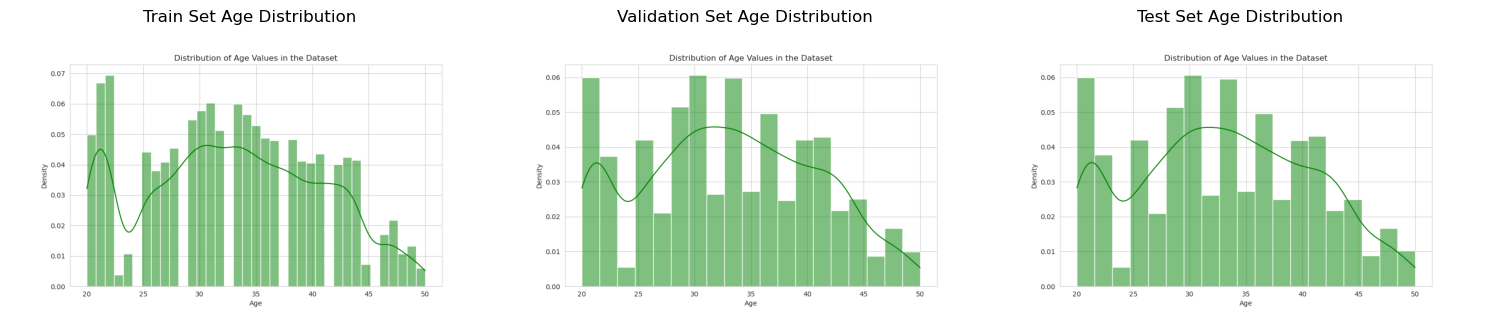

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Paths to your images
image_paths = ['/home/norakami/age-prediction/figs/train_set_age_distribution.png', 
               '/home/norakami/age-prediction/figs/valid_set_age_distribution.png', 
               '/home/norakami/age-prediction/figs/test_set_age_distribution.png']

# Load images
images = [mpimg.imread(image_path) for image_path in image_paths]

# Create a figure and axis
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns
titles = ['Train Set Age Distribution', 'Validation Set Age Distribution', 'Test Set Age Distribution']
# Display each image on a subplot
for ax, img, img_path, title in zip(axes, images, image_paths, titles):
    ax.imshow(img)
    ax.set_title(title)  # Optional: set the title to the image path
    ax.axis('off')  # Hide the axis

# Display the images
plt.tight_layout()
plt.show()